In [1]:
!pip install seaborn

In [2]:
import scipy.stats
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('bicicletas-compartidas.csv')

Variables Categoricas

In [4]:
df.columns

Index(['fecha', 'bicis-compartidas', 'temp-obs', 'sens-temp', 'hum', 'viento',
       'codigo-clima', 'festivo', 'findesemana', 'cuartil-ano'],
      dtype='object')

In [5]:
y = df['cuartil-ano'].apply(lambda x: 'cuartil+' + str(int(x)))

Text(0, 0.5, 'Frecuencia')

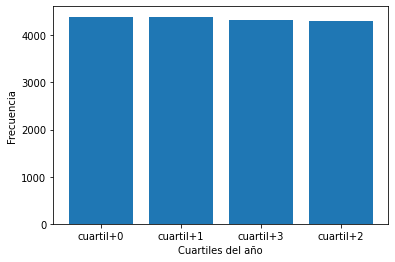

In [6]:
fig, ax = plt.subplots()
ax.bar(y.value_counts().index, y.value_counts())
ax.set_xlabel('Cuartiles del año')
ax.set_ylabel('Frecuencia')

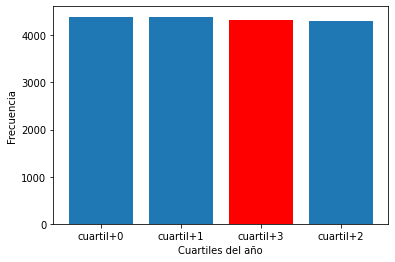

In [7]:
fig, ax = plt.subplots()
ax.bar(y.value_counts().index, y.value_counts())
ax.set_xlabel('Cuartiles del año')
ax.set_ylabel('Frecuencia')
ax.patches[2].set_facecolor('red')

Text(0.5, 1.0, 'Diagrama de pie')

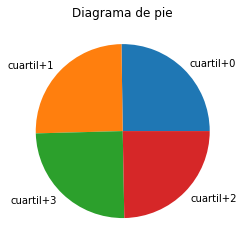

In [8]:
fig, ax = plt.subplots()
ax.pie(y.value_counts(), labels = y.value_counts().index)
ax.set_title('Diagrama de pie')

Variables numericas

In [9]:
y = df['viento']

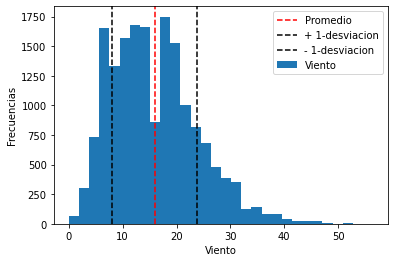

In [10]:
fig, ax = plt.subplots()
ax.hist(y, bins = 30, label = 'Viento')
ax.set_xlabel('Viento')
ax.set_ylabel('Frecuencias')
plt.axvline(np.mean(y), c = 'r', linestyle = '--', label = 'Promedio')
plt.axvline(np.mean(y)+np.std(y), c = 'k', linestyle = '--', label = '+ 1-desviacion')
plt.axvline(np.mean(y)-np.std(y), c = 'k', linestyle = '--', label = '- 1-desviacion')
ax.legend()

El minimo esta en 0
el primer cuartil es donde inicia la caja
segundo cuartil o la mediana en la linea anaranjada
el tercer cuartil donde termina la caja
un valor maximo en la linea final
y el retos son valores outlayer o valores atipicos

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd01ca3bee0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd01ca495e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd01ca3bb80>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd01ca49ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd01ca54040>],
 'means': []}

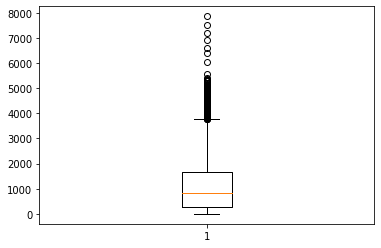

In [13]:
y = df['bicis-compartidas']
fig, ax = plt.subplots()
ax.boxplot(x = y)

<AxesSubplot:xlabel='cuartil-ano', ylabel='bicis-compartidas'>

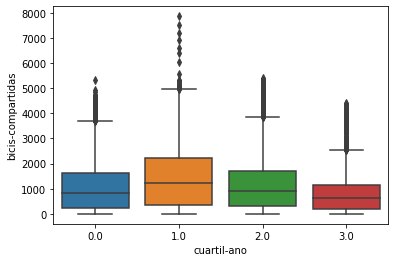

In [14]:
fig, ax = plt.subplots()
sns.boxplot(x = 'cuartil-ano', y = 'bicis-compartidas', data = df )

<bound method Axes.plot of <AxesSubplot:title={'center':'Distribucion conjuna de Viento y Bicis Compartidas'}, xlabel='Viento', ylabel='Bicis-Compartidas'>>

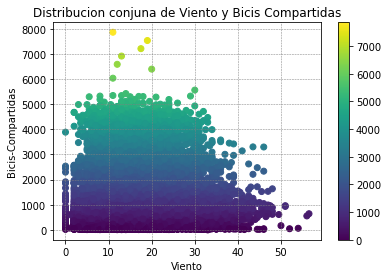

In [40]:
fig, ax = plt.subplots()
cs = ax.scatter( df['viento'], df['bicis-compartidas'], c=df['bicis-compartidas'], cmap='viridis', label='viento vs bicis')
ax.set_title('Distribucion conjuna de Viento y Bicis Compartidas')
ax.set_xlabel('Viento')
fig.colorbar(cs, ax=ax)
ax.set_ylabel('Bicis-Compartidas')
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.plot

<bound method Axes.plot of <AxesSubplot:title={'center':'Distribucion conjuna de Viento y Bicis Compartidas'}, xlabel='Viento', ylabel='Bicis-Compartidas'>>

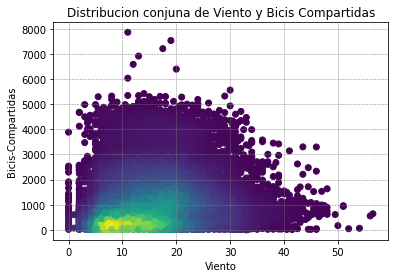

In [41]:
from scipy.stats import gaussian_kde

xy = np.vstack([df['viento'],df['bicis-compartidas']])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter( df['viento'], df['bicis-compartidas'], c=z, label='viento vs bicis')
ax.set_title('Distribucion conjuna de Viento y Bicis Compartidas')
ax.set_xlabel('Viento')
ax.set_ylabel('Bicis-Compartidas')
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.plot